In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
# Для работы с табличными данными
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

# Подрубаем рисовалки
import matplotlib.pyplot as plt
import seaborn as sns

# Подрубаем progress bar
from tqdm.notebook import tqdm

# Отрубаем warning
import warnings
warnings.filterwarnings('ignore')

/opt/miniconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
samples = pd.read_excel("../Data/20.01.23 список образцов Моча.xlsx", header=2)
samples.dropna(subset=['Gender'], inplace=True)

samples.fillna(0, inplace=True)
samples.reset_index(drop=True, inplace=True)

In [4]:
spectra1 = pd.read_csv('../Data/urine_chm001-250.csv')
spectra2 = pd.read_csv('../Data/urine_chm251-500.csv')
spectra_init = pd.concat([spectra1, spectra2], axis=0)

spectra = spectra_init.filter(regex='^Ch')

# mmscaler = MinMaxScaler(feature_range=(-1,1))
# spectra = pd.DataFrame(mmscaler.fit_transform(spectra.T).T)
del(spectra1, spectra2)

frame_lol = samples[['Gender','Age','Dataset']+list(samples.filter(regex=r'_a$').columns)]
spectra['Dataset'] = spectra_init['Dataset']
spectra = pd.merge(left=spectra, right=frame_lol, how='left', on='Dataset')
# spectra.dropna(subset=samples.filter(regex=r'_a$').columns, inplace=True)
spectra.dropna(how='any', inplace=True)
# spectra = spectra.reindex(index=range(spectra.shape[0]))
spectra = pd.DataFrame(spectra.values, columns=spectra.columns)

In [5]:
spectra.iloc[:,:36] = MinMaxScaler(feature_range=(0,1)).fit_transform(spectra.iloc[:,:36].T).T

In [6]:
from scipy.interpolate import interp1d

## Initial Spectra

In [7]:
spectra

,Ch_0_0,Ch_0_1,Ch_0_2,Ch_0_3,Ch_0_4,Ch_0_5,Ch_0_6,Ch_0_7,Ch_0_8,Ch_0_9,...,Squamous cells_a,Hyaline cylinders_a,Bacteria_a,Crystals_a,Ferment_a,Small cells_a,Pathological cylinders_a,Slime_a,Spermatozoon_a,TOTAL_a
0,0.00954787,0.00647428,0.0496854,0.202149,0.123593,0.387389,0.0411951,0.104526,0.142864,0.0218039,...,0,1,1,0,0,0,1,0,0,8
1,0.00894421,0.00674,0.0494082,0.213435,0.125622,0.417335,0.0405,0.107062,0.146123,0.0230812,...,0,1,1,0,0,0,1,0,0,8
2,0.00739949,0.00526416,0.0445294,0.188678,0.115589,0.379931,0.0363396,0.0986831,0.138609,0.0214772,...,0,1,1,0,0,0,1,0,0,8
3,0.0082852,0.00591103,0.0482445,0.200886,0.123995,0.399413,0.0384849,0.102645,0.144699,0.0221994,...,0,1,1,0,0,0,1,0,0,8
4,0.00744066,0.00525494,0.0440432,0.185445,0.113481,0.372787,0.0363931,0.0969895,0.136853,0.021068,...,0,1,1,0,0,0,1,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4246,0.0116899,0.00932396,0.0682565,0.311768,0.17593,0.650618,0.0485888,0.123997,0.158752,0.0254481,...,1,0,1,0,0,1,0,0,0,5
4247,0.0116642,0.00929229,0.0684821,0.312936,0.176323,0.655573,0.0487676,0.123926,0.159101,0.025267,...,1,0,1,0,0,1,0,0,0,5
4248,0.0117248,0.00924399,0.0686751,0.309914,0.176345,0.651669,0.0488446,0.124147,0.159036,0.025429,...,1,0,1,0,0,1,0,0,0,5
4249,0.0118475,0.00925553,0.0689756,0.310944,0.176901,0.650243,0.0490161,0.124191,0.159807,0.0254607,...,1,0,1,0,0,1,0,0,0,5


In [10]:
SensorWaves = [410, 435, 460, 485, 510, 535, 560, 585, 610, 645, 680, 705, 730, 760, 810, 860, 900, 940]

# SensorWaves = [610, 680, 730, 760, 810, 860, 560, 585, 645, 705, 900, 940, 410, 435, 460, 485, 510, 535]

NewWaves = np.arange(410,942,2)

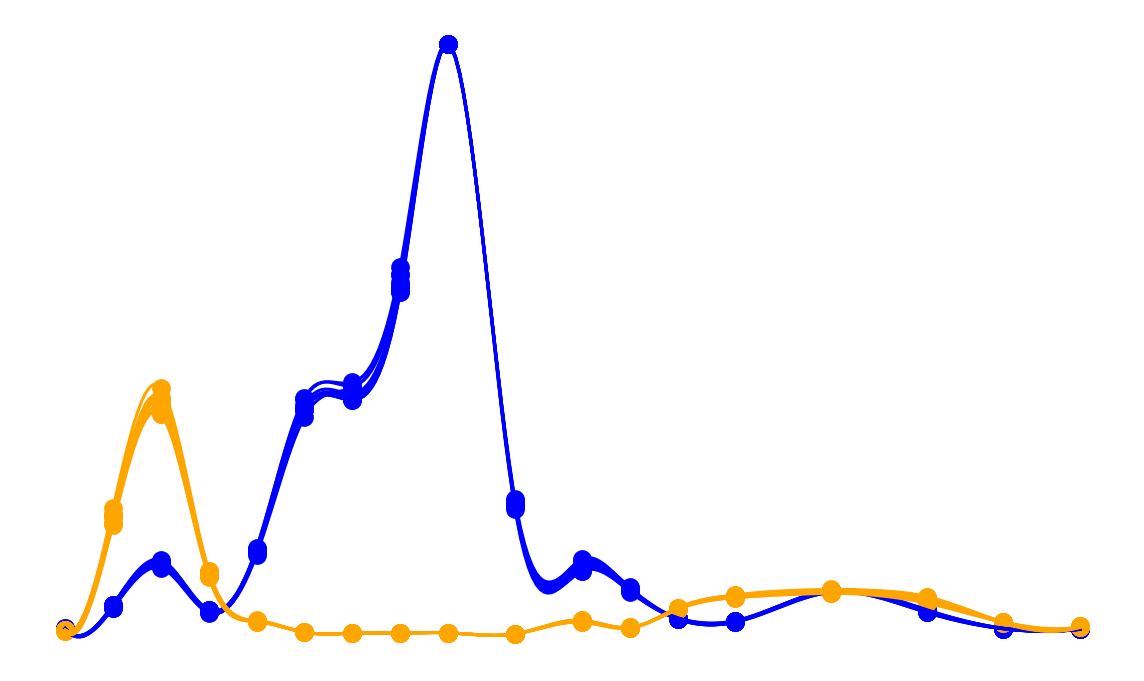

In [18]:
plt.figure(figsize=(10,6))
plt.xlabel('Wavelength, nm')
plt.xticks(SensorWaves)
for spec in spectra.values[:10,:36:2]:
    f = interp1d(SensorWaves, spec, kind='cubic')
    plt.scatter(SensorWaves, spec, s=70, c='blue')
    plt.plot(NewWaves, f(NewWaves), c='blue')
    
for spec in spectra.values[:10,1:36:2]:
    f = interp1d(SensorWaves, spec, kind='cubic')
    plt.scatter(SensorWaves, spec, s=70, c='orange')
    plt.plot(NewWaves, f(NewWaves), c='orange')
    
plt.axis("off")
plt.grid()

plt.savefig("../Results/Typical_Spectra_with_Wavelengths.png", transparent=True)

## Sum of two LED spectra

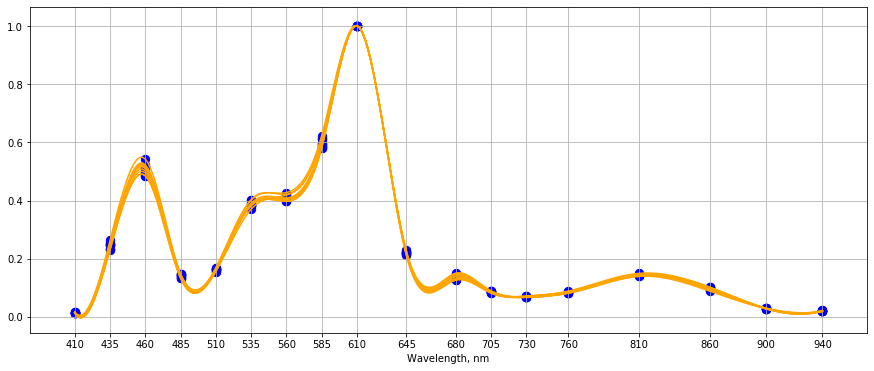

In [56]:
plt.figure(figsize=(15,6))
plt.xlabel('Wavelength, nm')
plt.xticks(SensorWaves)
for spec in spectra.values[:10,:36:2] + spectra.values[:10,1:36:2]:
    f = interp1d(SensorWaves, spec, kind='cubic')
    plt.scatter(SensorWaves, spec, s=70, c='b')
    plt.plot(NewWaves, f(NewWaves), c='orange')

    
plt.grid()

## Trigonometric average of two LED spectra

In [57]:
def TrigAVG(spec1, spec2, beta=1):
    return (1+beta**2)*spec1*spec2/(beta**2*spec1 + spec2)

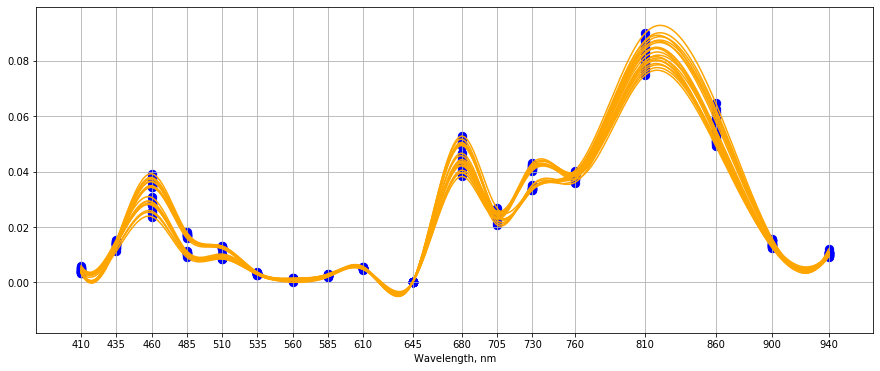

In [58]:
plt.figure(figsize=(15,6))
plt.xlabel('Wavelength, nm')
plt.xticks(SensorWaves)
for spec in TrigAVG(spectra.values[10:30,:36:2], spectra.values[10:30,1:36:2], beta=1):
    f = interp1d(SensorWaves, spec, kind='cubic')
    plt.scatter(SensorWaves, spec, s=70, c='b')
    plt.plot(NewWaves, f(NewWaves), c='orange')

    
plt.grid()